In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import statsmodels.api as sm
from statsmodels.formula.api import logit

In [2]:
df = pd.read_csv(".\input\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#print 10 rows from df
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
350,4,92,80,0,0,42.2,0.237,29,0
323,13,152,90,33,29,26.8,0.731,43,1
471,0,137,70,38,0,33.2,0.170,22,0
70,2,100,66,20,90,32.9,0.867,28,1
604,4,183,0,0,0,28.4,0.212,36,1
511,0,139,62,17,210,22.1,0.207,21,0
5,5,116,74,0,0,25.6,0.201,30,0
537,0,57,60,0,0,21.7,0.735,67,0
234,3,74,68,28,45,29.7,0.293,23,0
406,4,115,72,0,0,28.9,0.376,46,1


In [5]:
#Get to know the data types that exist in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# summary of data
df.drop(columns="Outcome").describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
#Store agewise records for better access
df.loc[ (df["Age"] > 20 ) & (df["Age"] < 31), "n_age"] = "21-30"
df.loc[ (df["Age"] > 30 ) & (df["Age"] < 41), "n_age"] = "31-40"
df.loc[ (df["Age"] > 40 ) & (df["Age"] < 51), "n_age"] = "41-50"
df.loc[ (df["Age"] > 50 ) & (df["Age"] < 61), "n_age"] = "51-60"
df.loc[ (df["Age"] > 60 ) & (df["Age"] < 71), "n_age"] = "61-70"
df.loc[ (df["Age"] > 70 ) & (df["Age"] < 82), "n_age"] = "71-81"

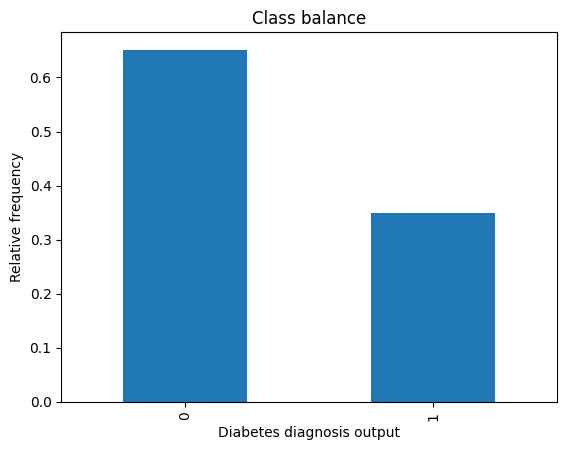

In [8]:
df["Outcome"].value_counts(normalize=True).plot(kind="bar",
                                                xlabel="Diabetes diagnosis output", ylabel="Relative frequency", title="Class balance");

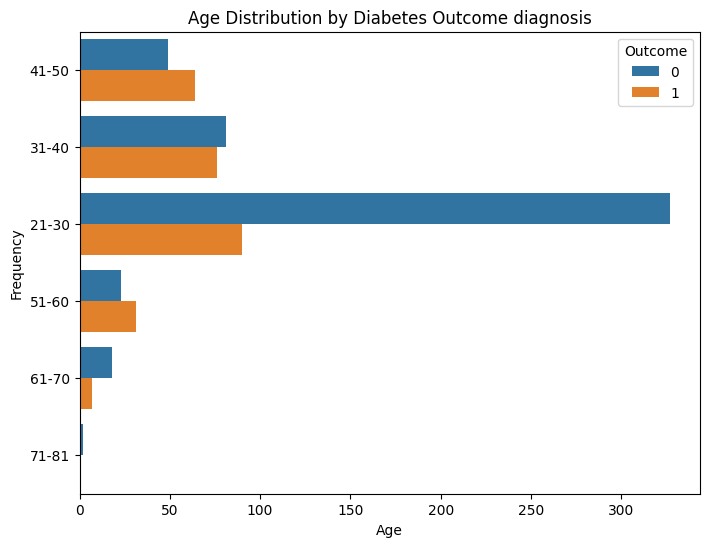

In [9]:
# Plot chart for age distribution
#Outcome : 1- is diabetic 0 - is not diabetic
plt.figure(figsize=(8, 6))
sns.countplot(y="n_age", hue=df["Outcome"], data=df)

plt.title("Age Distribution by Diabetes Outcome diagnosis")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

In [10]:
#Glucose Factor

print("min", df["Glucose"].min())
print("max",df["Glucose"].max())

min 0
max 199


In [11]:
high = df[(df["Glucose"] > 99)]
(high["Glucose"].groupby(df["Outcome"]).count() / len(high)).round(2).to_frame()

,Glucose
Outcome,
0,0.56
1,0.44


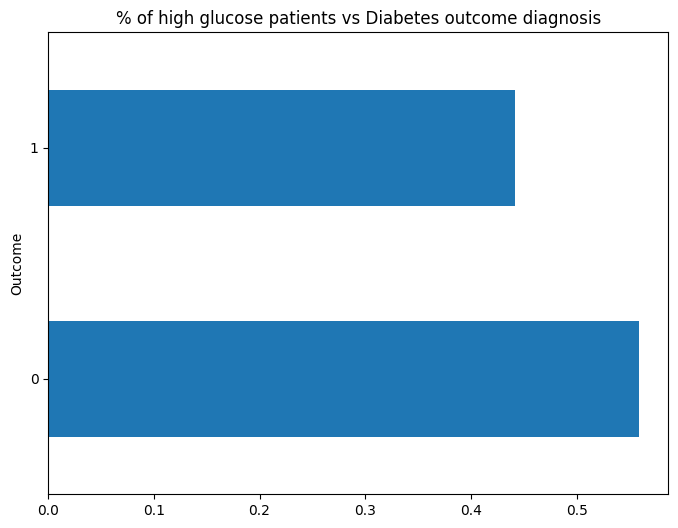

In [12]:
plt.figure(figsize=(8, 6))
(high["Glucose"].groupby(df["Outcome"]).count() / len(high)).plot(kind="barh")
plt.title("% of high glucose patients vs Diabetes outcome diagnosis");

In [13]:
low = df[(df["Glucose"] < 99)]
(low["Glucose"].groupby(df["Outcome"]).count() / len(low)).round(2).to_frame()

,Glucose
Outcome,
0,0.91
1,0.09


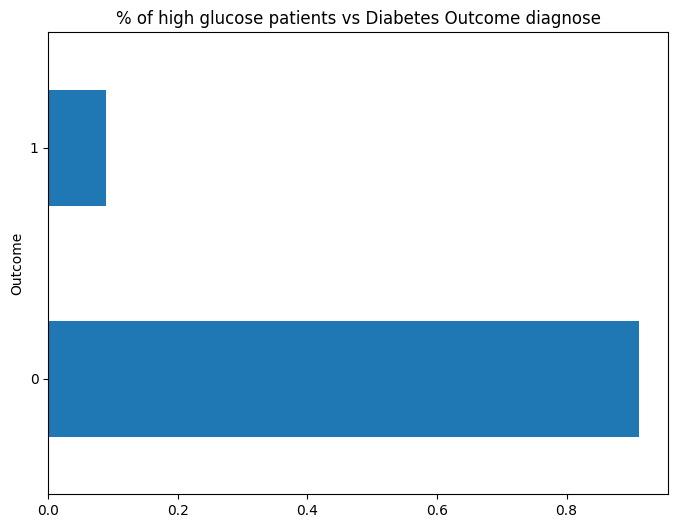

In [14]:
low = df[(df["Glucose"] < 99)]
plt.figure(figsize=(8, 6))
plt.xlabel("Relative frequency")
(low["Glucose"].groupby(df["Outcome"]).count() / len(low)).plot(kind="barh")
plt.title("% of high glucose patients vs Diabetes Outcome diagnose");

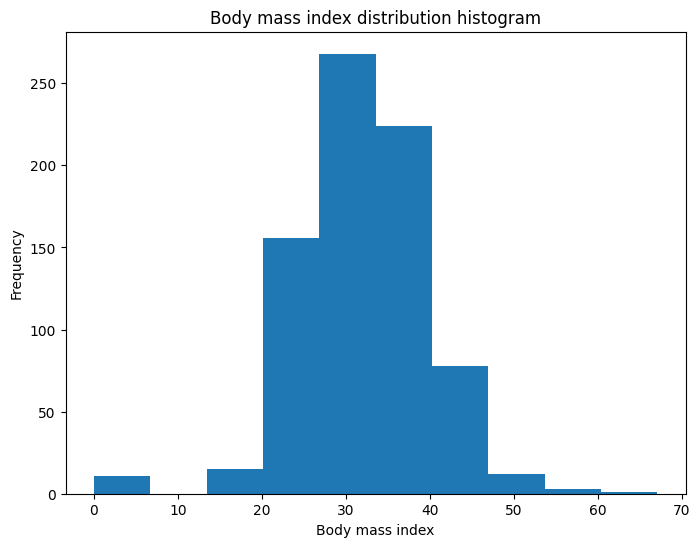

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df["BMI"])
plt.ylabel("Frequency")
plt.xlabel("Body mass index")
plt.title("Body mass index distribution histogram");

In [16]:
high = df[(df["BMI"] >= 30)]
(high["BMI"].groupby(df["Outcome"]).count() / len(high)).round(2).to_frame()

,BMI
Outcome,
0,0.54
1,0.46


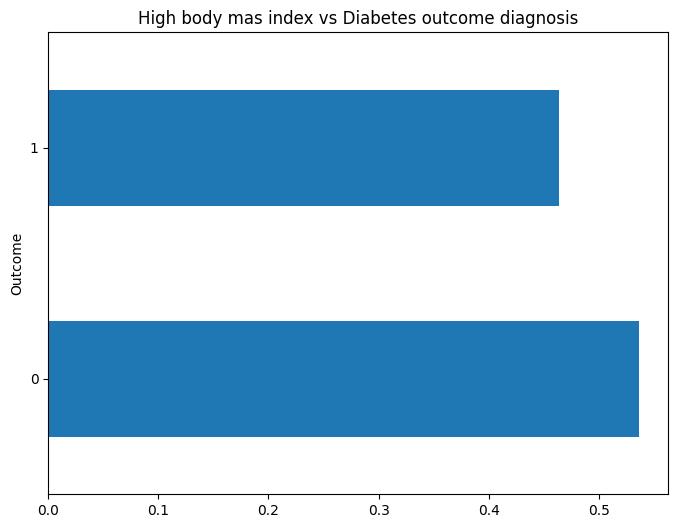

In [17]:
plt.figure(figsize=(8, 6))
plt.title("High body mas index vs Diabetes outcome diagnosis")
plt.xlabel("Relative frequency")
(high["BMI"].groupby(df["Outcome"]).count() / len(high)).plot(kind="barh");

In [18]:
# Low body mass index
low = df[(df["BMI"] < 30)]
(low["BMI"].groupby(df["Outcome"]).count() / len(low)).round(2).to_frame()

,BMI
Outcome,
0,0.83
1,0.17


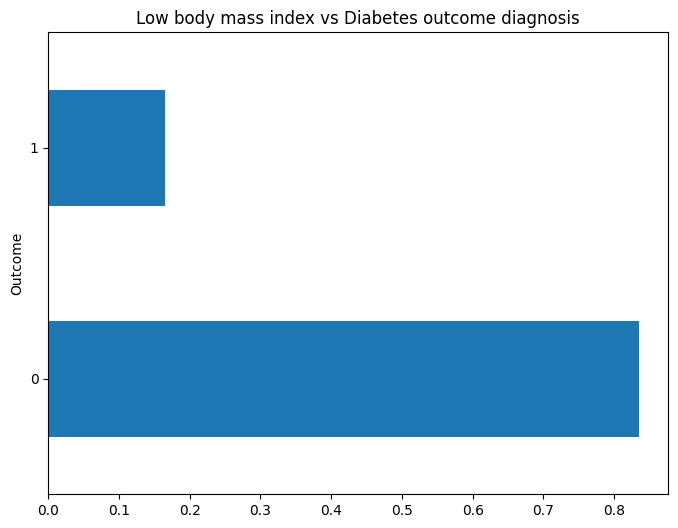

In [19]:
plt.figure(figsize=(8, 6))
plt.title("Low body mass index vs Diabetes outcome diagnosis")
plt.xlabel("Relative frequency")
(low["BMI"].groupby(df["Outcome"]).count() / len(low)).plot(kind="barh");

In [20]:
X = df.drop(columns=["Pregnancies","n_age","Outcome","Age"])
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288


In [21]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
#Train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42) 

In [23]:
#baseline model

y_train.value_counts(normalize=True).max()

0.6499068901303539

In [24]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("baseline_accuray is", round(acc_baseline, 2))

baseline_accuray is 0.65


In [25]:
#Fitting the model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
#Model evaluation

acc_score_train = accuracy_score(y_train, model.predict(X_train))
acc_score_test = model.score(X_test, y_test)
print("Training accuracy", round(acc_score_train, 2))
print("test accuracy", round(acc_score_test, 2))

Training accuracy 0.78
test accuracy 0.74


In [27]:
#Communicate results

model.predict(X_train)[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [28]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.93556953 0.06443047]
 [0.81888017 0.18111983]
 [0.41270603 0.58729397]
 [0.63774739 0.36225261]
 [0.6268468  0.3731532 ]]


In [29]:
x = pd.merge(X_train, y_train,left_index=True, right_index=True)
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
334,95,60,18,58,23.9,0.260,0
139,105,72,29,325,36.9,0.159,0
485,135,68,42,250,42.3,0.365,1
547,131,68,21,166,33.1,0.160,0
18,103,30,38,83,43.3,0.183,0


In [30]:
lr = logit("Outcome ~ Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction", x).fit()  

Optimization terminated successfully.
         Current function value: 0.479507
         Iterations 6


In [31]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                  0.2595
Time:                        13:44:01   Log-Likelihood:                -257.50
converged:                       True   LL-Null:                       -347.71
Covariance Type:            nonrobust   LLR p-value:                 2.752e-36
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.6020      0.864     -9.958      0.000     -10.295      -6.909
Glucose                      0.0397      0.005      8.548      0.000       0.031       0.